<a href="https://colab.research.google.com/github/MirajShah12/ML_Learning/blob/main/Diabetes_Test_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Loading the Dataframe into diabetes_df
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [ ]:
#Looking at the params of the DF
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# Figure out how many features there are
diabetes_df.info()
diabetes_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [ ]:
#Adding the target onto the df (said to in documentation)
diabetes_df['target'] = diabetes.target

<ipython-input-7-ddd6f2cca7b2>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


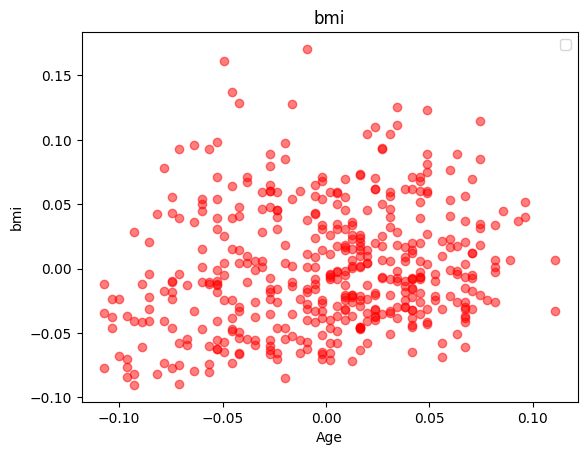

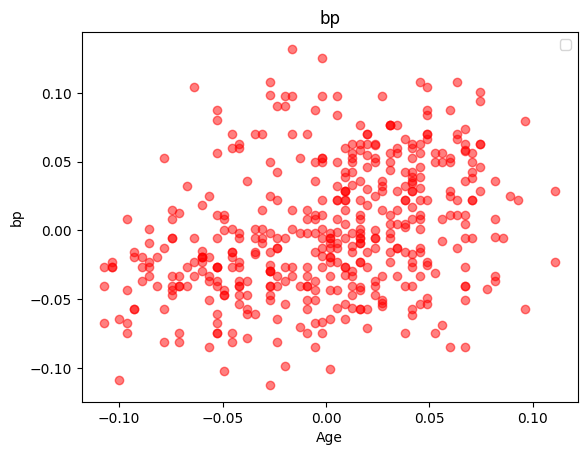

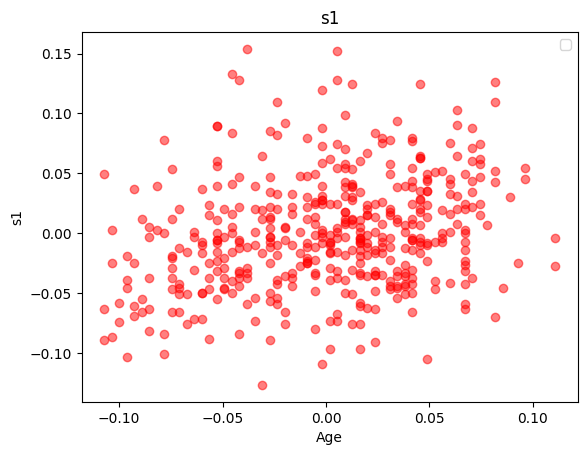

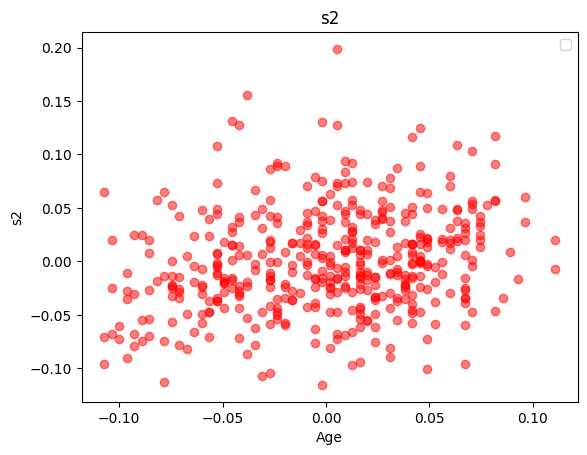

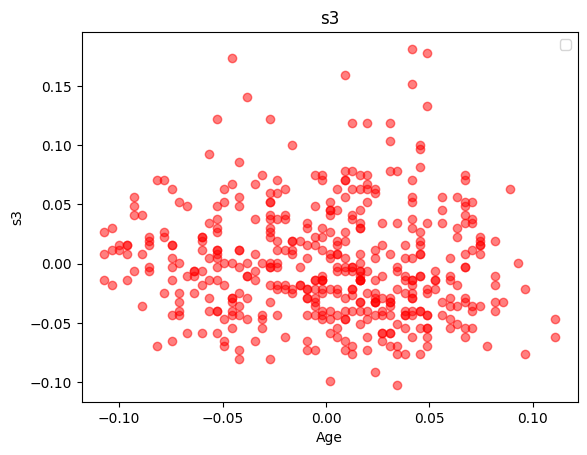

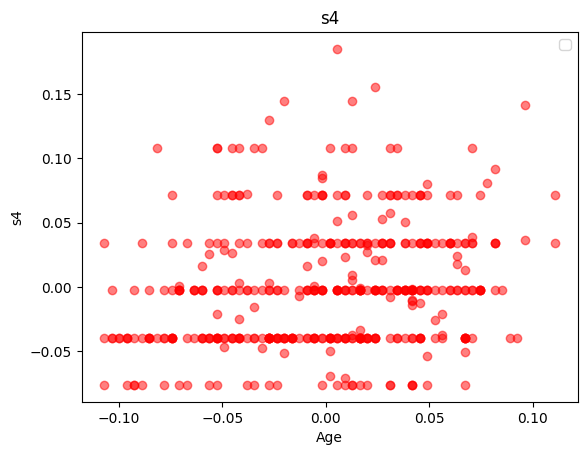

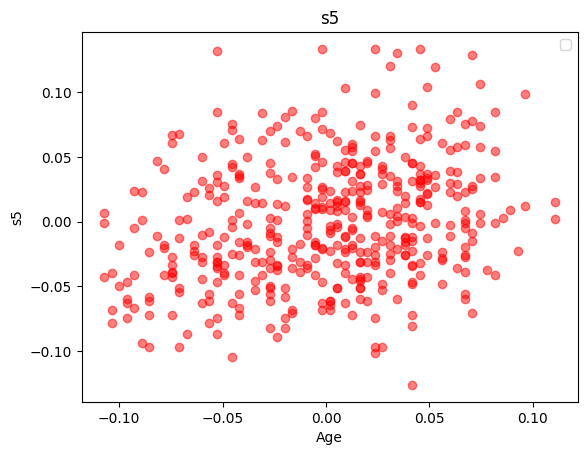

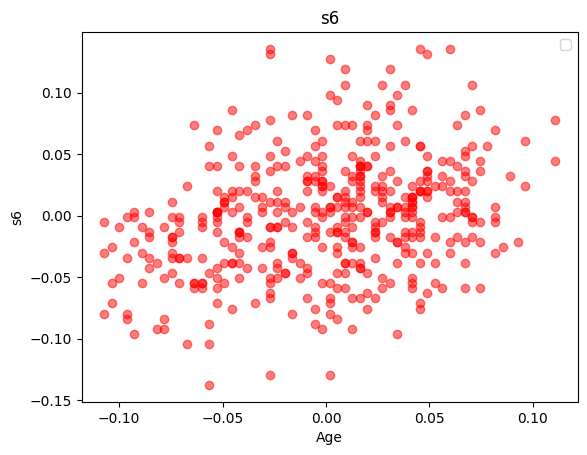

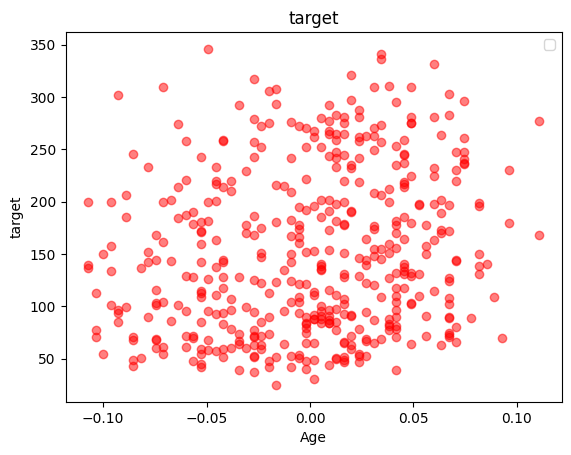

In [ ]:
#Checking the graphs to see any correlation from the beginning. Learned that it is always important to visualize data
for col in diabetes_df.columns:
  if col not in ['age', 'sex']:
    plt.scatter(diabetes_df['age'], diabetes_df[col], alpha = 0.5, color = "red")
    plt.title(col)
    plt.xlabel('Age')
    plt.ylabel(col)
    plt.legend()

    plt.show()

In [ ]:
#Creating the correlation matrix to start the initial feature elimination
corr_matrix = diabetes_df.corr()
corr_matrix["target"].sort_values(ascending=False)

,target
target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


<ipython-input-9-88fa69286eda>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


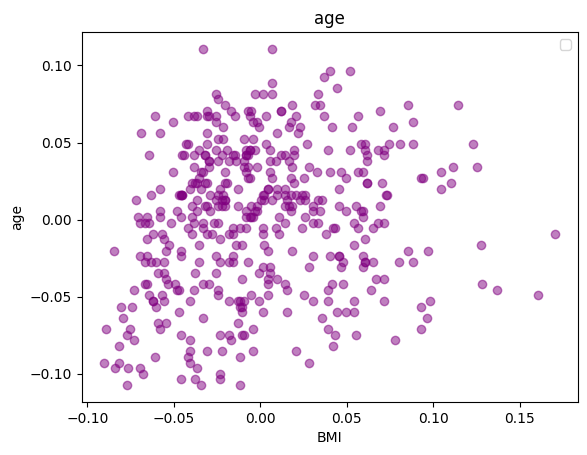

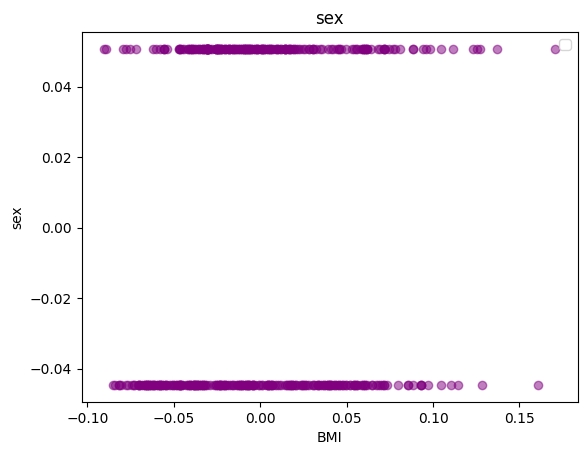

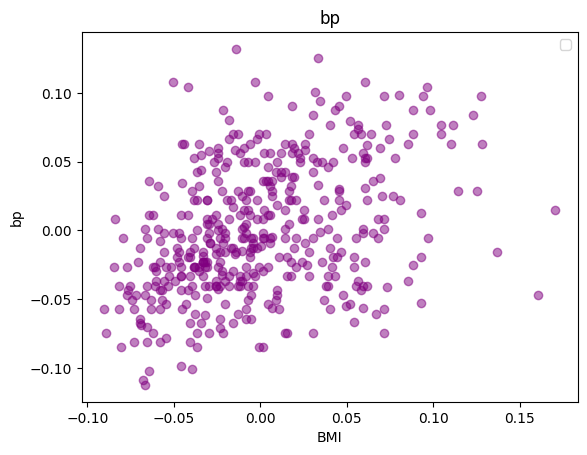

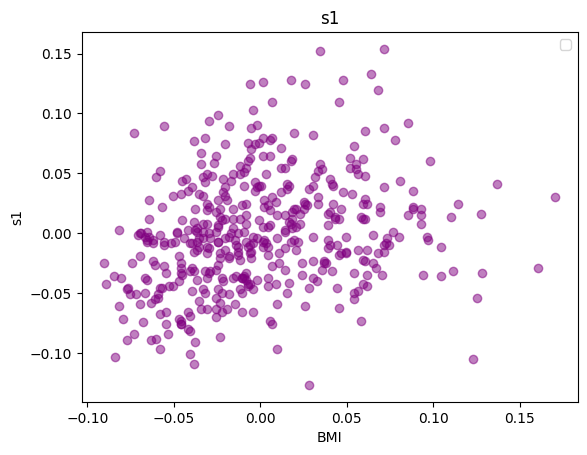

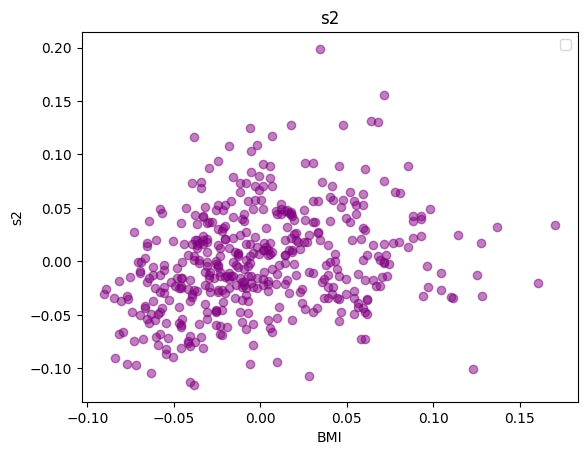

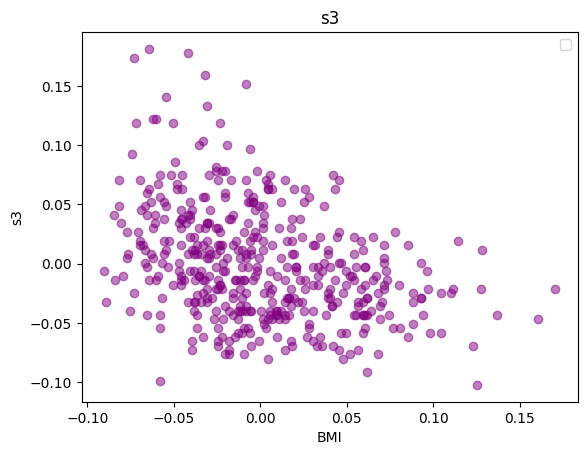

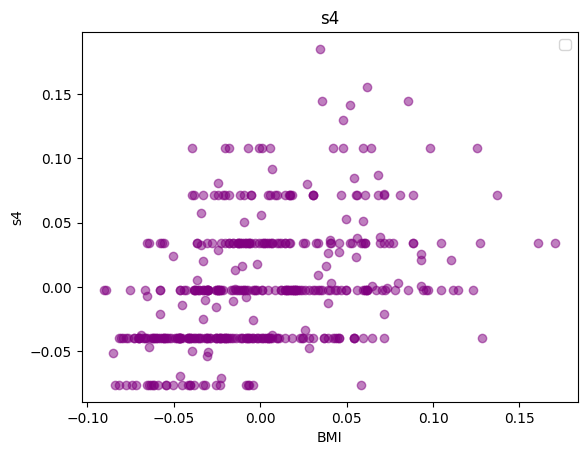

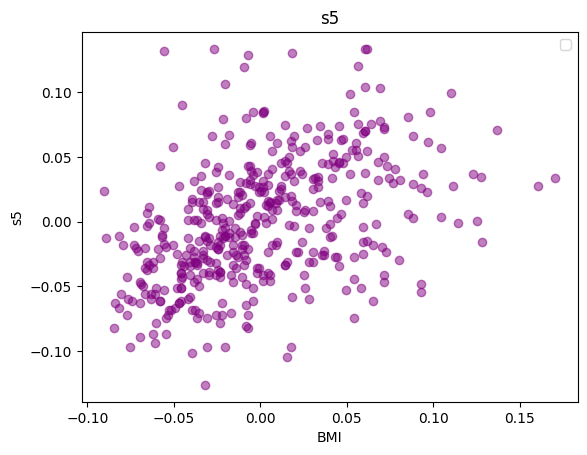

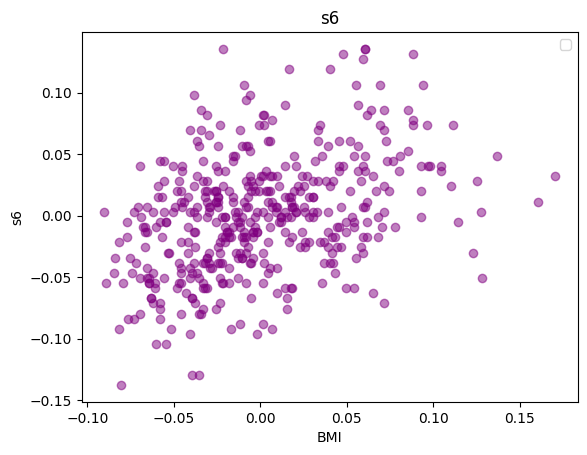

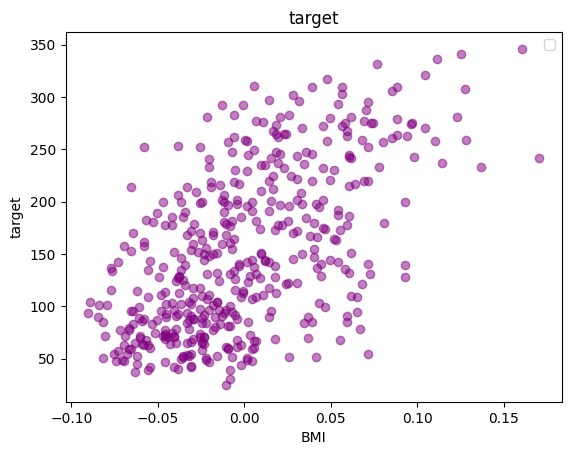

In [ ]:
#Looking at BMI versus all the factors
for col in diabetes_df.columns:
  if col not in ['bmi']:
    plt.scatter(diabetes_df['bmi'], diabetes_df[col], alpha = 0.5, color = "purple")
    plt.title(col)
    plt.xlabel('BMI')
    plt.ylabel(col)
    plt.legend()
    plt.show()

<ipython-input-10-5426109f69ab>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


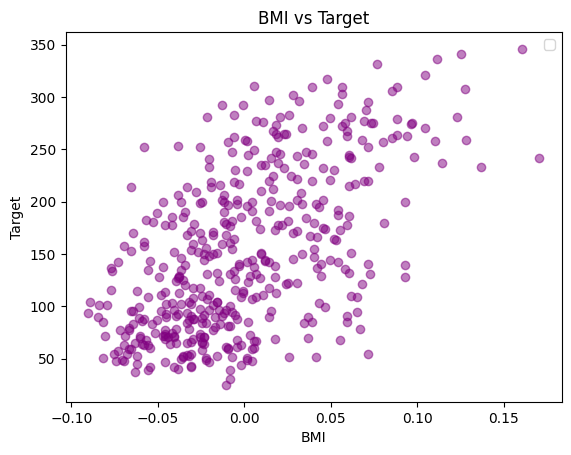

In [ ]:
#Noticed a strong correlation with bmi and the target in the beginning so wanted to get this graph specifcally
plt.scatter(diabetes_df['bmi'], diabetes_df['target'], alpha = 0.5, color = "purple")
plt.title('BMI vs Target')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.legend()

plt.show()

In [ ]:
#Initial drop of sex since low correlation (can look at this again)
X = diabetes_df.drop(['target', 'sex'], axis=1)
y = diabetes_df['target']

In [ ]:
#regular data cleaning
X = X.dropna()
y = y.dropna()

In [ ]:
#Used train_test_split in order to split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Training the model using data
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("R2: ", r2)

MSE:  2986.7329221144396
R2:  0.4362688983095515


In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest Regressor to look at later with tuning
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)

y_pred = rfg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("R2: ", r2)

MSE:  3108.526704494382
R2:  0.4132809228492331


In [ ]:
#Looking at the cross_val later to see if the Random Forest was actually any good
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rfg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rsme_scores = np.sqrt(-rf_scores)

lg_scores = cross_val_score(reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lg_rsme_scores = np.sqrt(-lg_scores)

In [ ]:
print("Random Forest RMSE Scores: ", rf_rsme_scores.mean())
print("Linear Regression RMSE Scores: ", lg_rsme_scores.mean())

Random Forest RMSE Scores:  58.895482225216746
Linear Regression RMSE Scores:  56.57302125811039


In [ ]:
#LOOK AT LATER (Grid Search Using RFR)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
grid_search = GridSearchCV(rfg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Looking at the coefficents now to see if any are having a less significant impact. This could help with our understanding of the model
pd.Series(reg.coef_, index=X_train.columns).sort_values(ascending=True)

,0
s1,-884.576392
age,3.493899
s6,38.063134
s4,183.397668
s3,194.696552
bp,304.219041
s2,510.316288
bmi,590.239293
s5,762.802448


In [ ]:
#Decided to drop age (Looks like all the factors in the dataset were already normalized)
X = X.drop('age', axis=1)

In [ ]:
#Looking at the corr_matrix again will use this later to automatically see which factors fall under our threshold
corr_matrix['target'].sort_values(ascending=False)

,target
target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


In [ ]:
import seaborn as sns

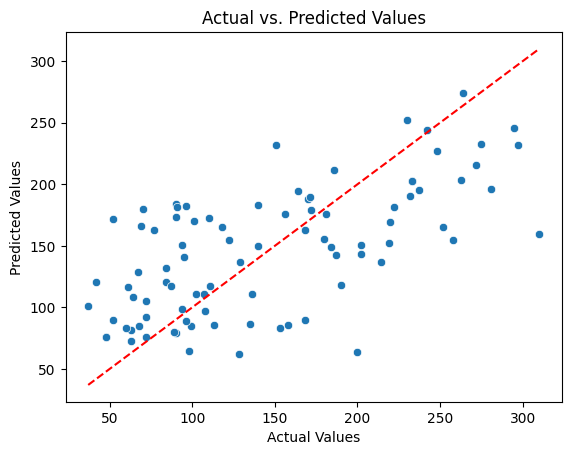

In [ ]:
#Plotting the residuals for the test set versus the train set on the predictions to see for overfitting
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [ ]:
sns.scatterplot(x=y_train, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.show()

ValueError: array length 89 does not match index length 353

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Trying Gaussian Bayes but seems unsuccessful
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("R2: ", r2)

In [ ]:
X.info()
#Looking at the factors again but came back to code after a while
diabetes_df.corr()['target'].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     442 non-null    float64
 1   bp      442 non-null    float64
 2   s1      442 non-null    float64
 3   s2      442 non-null    float64
 4   s3      442 non-null    float64
 5   s4      442 non-null    float64
 6   s5      442 non-null    float64
 7   s6      442 non-null    float64
dtypes: float64(8)
memory usage: 27.8 KB


,target
target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


In [ ]:
#Still manually dropping factors, will add a function later on to optimize it
X = X.drop('s2', axis=1)

In [ ]:
#This was the last time i created a test model when dropping factors, this is all automized now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE: ", mse)
print("R2: ", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

In [ ]:
def make_table(mse, r2):
  table = pd.DataFrame(columns=['All Factors'])
  table.loc['MSE'] = mse
  table.loc['R2'] = r2
  return table
def update_table(table, mse, r2, remove_col):
  col_name = 'All minus: ' + remove_col
  table[col_name] = [mse, r2]
  return table

In [ ]:
#Function that tests the factors that I give it. next step will be seeing how this compares to the test set
#Function will plot the factors to see overfitting
def test_factors(X, y):
  X = X.dropna()
  y = y.dropna()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  reg = LinearRegression()
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  coeffs = pd.Series(reg.coef_, index=X_train.columns).sort_values(ascending=True)

  y_train_pred = reg.predict(X_train)
  mse_train = mean_squared_error(y_train, y_train_pred)
  r2_train = r2_score(y_train, y_train_pred)

  #Nested function to use within the model
  def test_overfitting(y_test, t_train_pred):
    plt.scatter(y_test, y_pred, color='red')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')

    plt.scatter(y_train, y_train_pred, color='blue')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')

    plt.show()
  test_overfitting(y_test, y_train_pred)

  return mse, r2, coeffs

In [ ]:
table = make_table(mse, r2)

In [ ]:
#This was me trying to figure out how to properly loop to get those column factors with the correlations
corr_matrix = diabetes_df.corr()
corr_matrix = corr_matrix.drop('target')
corr_matrix = corr_matrix['target'].sort_values(ascending=True)

for feature, corr_value in corr_matrix.items():
    print(f"{feature}: {corr_value:.4f}")

In [ ]:
#Now this the correlation elimination part of the code
threshold = .40

X = diabetes_df.drop(['target'], axis=1)
y = diabetes_df['target']

mse, r2, coeffs = test_factors(X, y)
table = make_table(mse, r2)
#Seems to be pretty good at not overfitting

In [ ]:
#Looking at table now
table

In [ ]:
#Looping through each factor and seeing if it is worth removing or not
for feature, corr_value in corr_matrix.items():
  if abs(corr_value) < threshold and feature in X.columns:
    X = X.drop(feature, axis=1)
    mse, r2, coeffs = test_factors(X, y)
    table = update_table(table, mse, r2, feature)
#the model seems to be doing a good job at not overfitting

In [ ]:
table

In [ ]:
#Predicted versus actual to see if there is a relation. Will now test this using the test dataset to see
plt.scatter(y_test, y_pred, color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

In [ ]:
X = X.drop('s4', axis=1)
mse, r2 = test_factors(X, y)
table = update_table(table, mse, r2, 's4')

In [ ]:
mse, r2, coeffs = test_factors(X, y)

print(coeffs)
table = update_table(table, mse, r2, 's4')
table

In [ ]:
#Using this to see The standard weights on the factors, Looks like bp has a weaker impact
(pd.Series(coeffs, index=X.columns) * X.std()).sort_values()

In [ ]:
#Residual Plot
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='-')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predictions")
plt.show()

In [ ]:
#Cross Val Scoring but will look at later.
scores = cross_val_score(reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rsme_scores = np.sqrt(-scores)

print("Cross-validated RMSE mean:", rsme_scores.mean())
print("Std:", rsme_scores.std())

In [ ]:
#Next few steps:
# Try stratified sampling
# Re-look at the Random Forest
# Try cross val and grid searching properly

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
#We will reset X and y and instead run the same functions again except by using Stratified Sampling
X = diabetes_df.drop(['target'], axis=1)
y = diabetes_df['target']

def test_stratifed_factors(X, y, y_binned):
  X = X.dropna()
  y = y.dropna()

  #Doing the splitting here for the categories
  split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=16)
  for train_index, test_index in split.split(X, y_binned):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  reg = LinearRegression()
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print("MSE: for test set: ", mse)
  print("R2: for test set: ", r2)

  #Creating a prediction set on the training data
  y_train_pred = reg.predict(X_train)
  mse_train = mean_squared_error(y_train, y_train_pred)
  r2_train = r2_score(y_train, y_train_pred)

  print("MSE: for train set: ", mse_train)
  print("R2: for train set: ", r2_train)
  #Same overfitting function exept using to test
  def test_overfitting(y_test, y_train_pred):
    plt.scatter(y_test, y_pred, color='red')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.scatter(y_train, y_train_pred, color='blue')
    plt.show()
  test_overfitting(y_test, y_train_pred)
  coef = pd.Series(reg.coef_, index=X_train.columns).sort_values(ascending=True)
  return mse, r2, mse_train, r2_train, coef

In [ ]:
diabetes_df['target_binned'] = pd.qcut(diabetes_df['target'], q=25, labels=False)
X = X.drop(['target_binned'], axis=1)
y = diabetes_df['target']
y_binned = diabetes_df['target_binned']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            442 non-null    float64
 1   sex            442 non-null    float64
 2   bmi            442 non-null    float64
 3   bp             442 non-null    float64
 4   s1             442 non-null    float64
 5   s2             442 non-null    float64
 6   s3             442 non-null    float64
 7   s4             442 non-null    float64
 8   s5             442 non-null    float64
 9   s6             442 non-null    float64
 10  target_binned  442 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


MSE: for test set:  2794.781498816611
R2: for test set:  0.5204526905290001
MSE: for train set:  2883.228128555061
R2: for train set:  0.5158680062436907


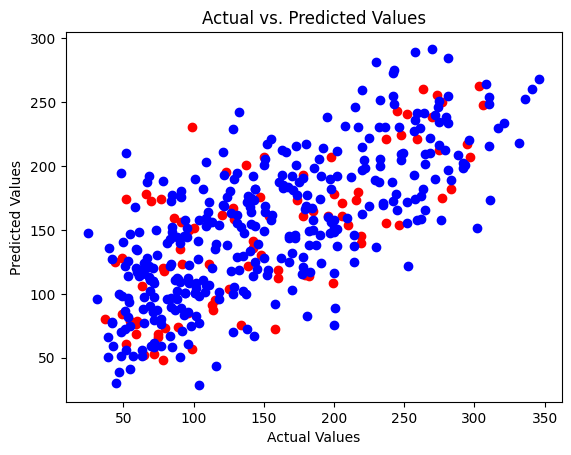

In [ ]:
#Plot for seeing overfitting
mse, r2, mse_train, r2_train, coef = test_stratifed_factors(X, y, y_binned)

In [ ]:
#Coefficients
print(coef)

s1    -978.811769
sex   -255.058310
age    -36.010588
s6      46.777665
s3     151.032208
s4     180.301516
bp     343.472682
bmi    503.475202
s2     634.323497
s5     836.401445
dtype: float64


In [ ]:
#Setting up the corr matrix for this task
corr_matrix = diabetes_df.corr()
corr_matrix = corr_matrix.drop('target')
corr_matrix = corr_matrix['target'].sort_values(ascending=True)
corr_matrix

,target
s3,-0.394789
sex,0.043062
s2,0.174054
age,0.187889
s1,0.212022
s6,0.382483
s4,0.430453
bp,0.441482
s5,0.565883
bmi,0.586450


In [ ]:
#Creating a stratified sample table for these factors
strat_table = make_table(mse, r2)
train_strat_table = make_table(mse_train, r2_train)
print(strat_table)
print(train_strat_table)

     All Factors
MSE  2794.781499
R2      0.520453
     All Factors
MSE  2883.228129
R2      0.515868


MSE: for test set:  2785.9569363288037
R2: for test set:  0.5219668680058721
MSE: for train set:  2886.403710361283
R2: for train set:  0.515334784215244


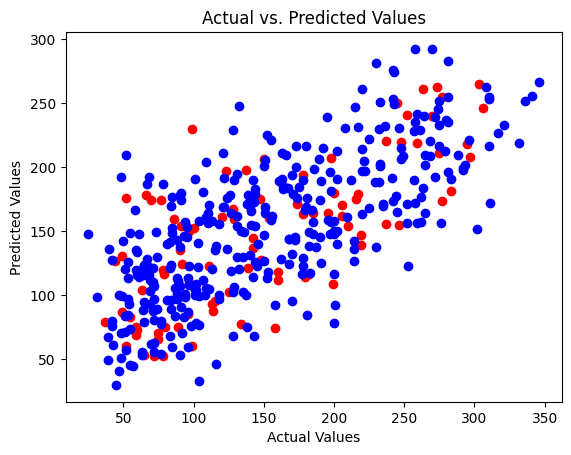

MSE: for test set:  2825.2661706508284
R2: for test set:  0.5152219265625164
MSE: for train set:  3001.2459479059175
R2: for train set:  0.49605125930811744


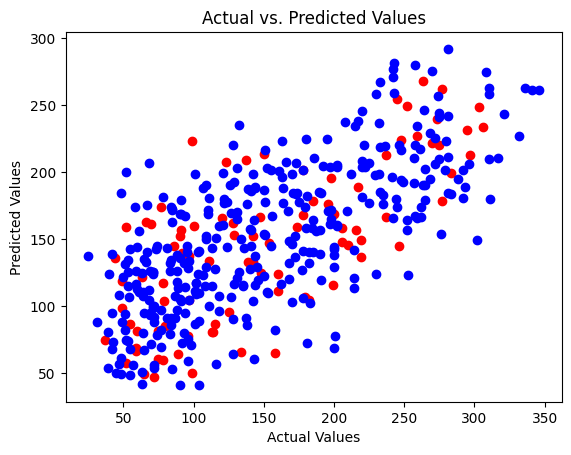

MSE: for test set:  2766.333853661252
R2: for test set:  0.5253339278281645
MSE: for train set:  2904.7847337779854
R2: for train set:  0.5122483681852822


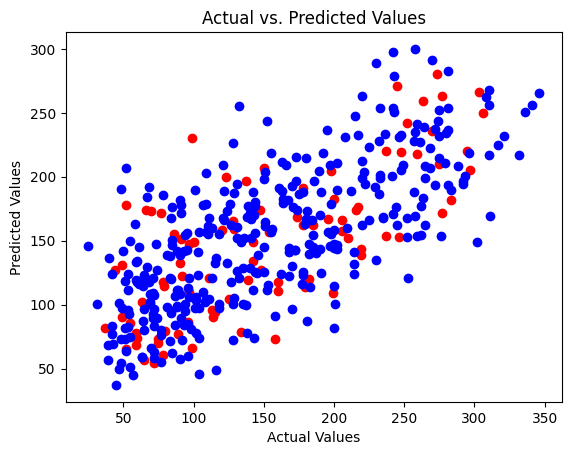

MSE: for test set:  2778.930534564524
R2: for test set:  0.5231725050342944
MSE: for train set:  2885.6276388624624
R2: for train set:  0.5154650968458335


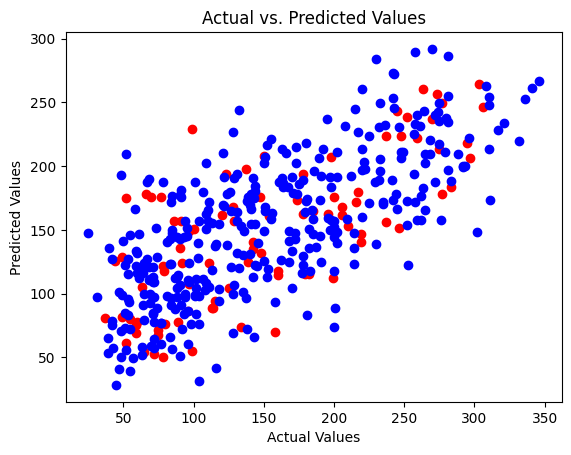

MSE: for test set:  2770.1022080841026
R2: for test set:  0.524687328362204
MSE: for train set:  2917.4129324448563
R2: for train set:  0.5101279272331446


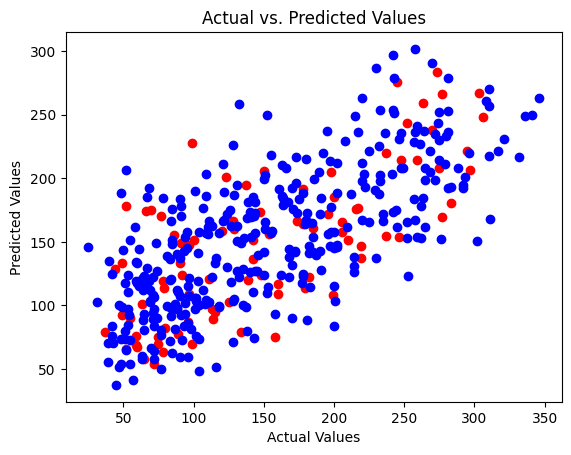

MSE: for test set:  2812.5064384332095
R2: for test set:  0.5174113267918796
MSE: for train set:  2886.480483384248
R2: for train set:  0.5153218930130854


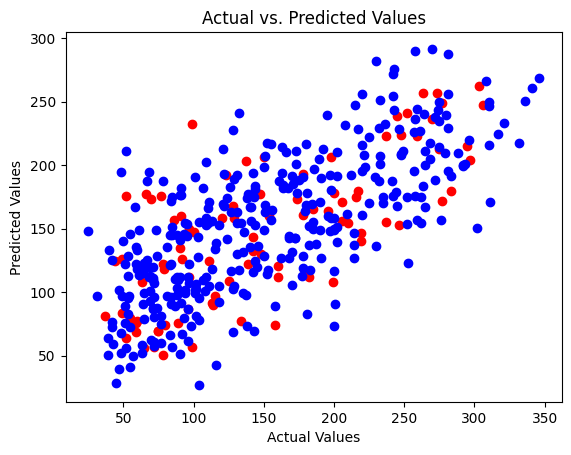

MSE: for test set:  2799.969366688047
R2: for test set:  0.5195625214475561
MSE: for train set:  2891.253144832811
R2: for train set:  0.5145205002687053


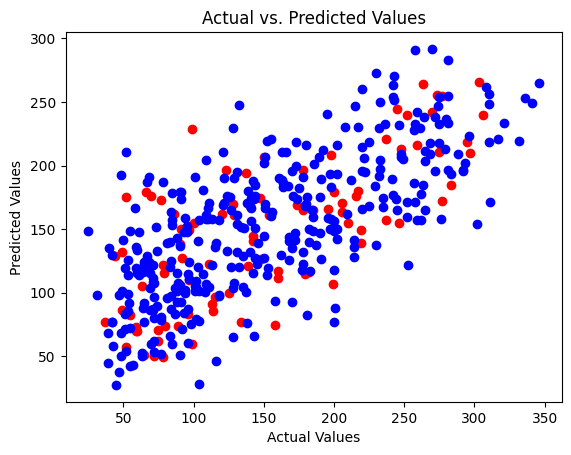

MSE: for test set:  2876.695217393836
R2: for test set:  0.5063973866102123
MSE: for train set:  3068.617732267566
R2: for train set:  0.4847386489867582


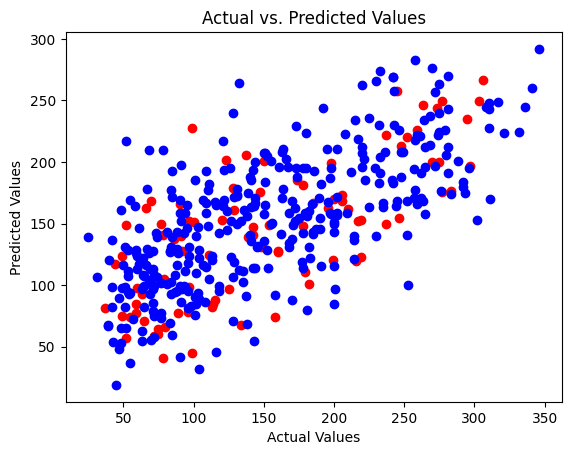

MSE: for test set:  2827.175797803184
R2: for test set:  0.5148942599583854
MSE: for train set:  3032.7710318329373
R2: for train set:  0.49075778232522893


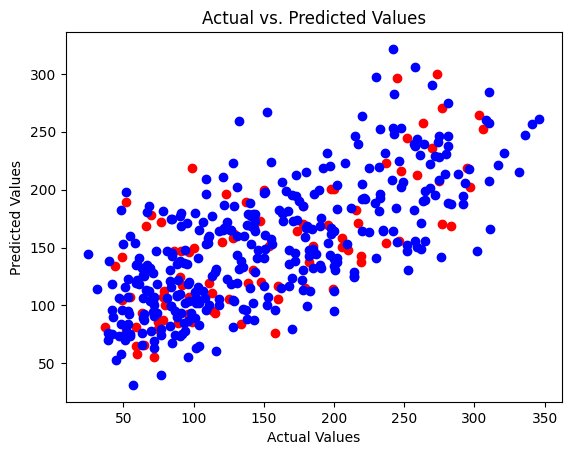

MSE: for test set:  3210.195319407393
R2: for test set:  0.4491732076550331
MSE: for train set:  3287.488839384956
R2: for train set:  0.4479873061377635


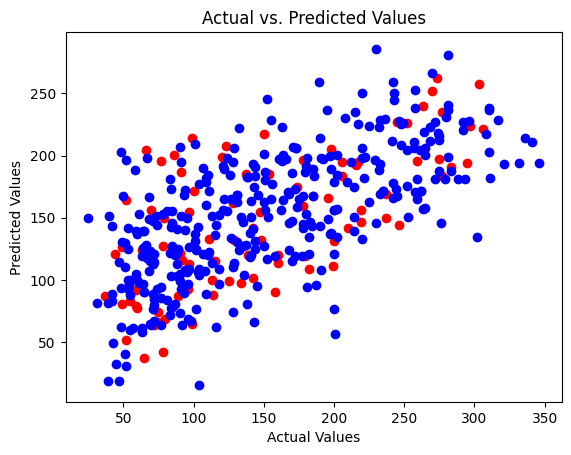

     All Factors  All minus: s3  All minus: sex  All minus: s2  \
MSE  2794.781499    2785.956936     2825.266171    2766.333854   
R2      0.520453       0.521967        0.515222       0.525334   

     All minus: age  All minus: s1  All minus: s6  All minus: s4  \
MSE     2778.930535    2770.102208    2812.506438    2799.969367   
R2         0.523173       0.524687       0.517411       0.519563   

     All minus: bp  All minus: s5  All minus: bmi  
MSE    2876.695217    2827.175798     3210.195319  
R2        0.506397       0.514894        0.449173  
     All Factors  All minus: s3  All minus: sex  All minus: s2  \
MSE  2883.228129    2886.403710     3001.245948    2904.784734   
R2      0.515868       0.515335        0.496051       0.512248   

     All minus: age  All minus: s1  All minus: s6  All minus: s4  \
MSE     2885.627639    2917.412932    2886.480483    2891.253145   
R2         0.515465       0.510128       0.515322       0.514521   

     All minus: bp  All minus: s5  A

In [ ]:
#Have to set up the factors for being dropped. Basically first tested to see which factors to drop and dropped them one by one
#Each time, the factor is added back, different than the methodology above of just removing the factors
X = diabetes_df.drop(['target', 'target_binned'], axis = 1)
for feature, corr_value in corr_matrix.items():
  if feature in X.columns:
    X_temp = X.drop(feature, axis=1)
    mse, r2, mse_train, r2_train, coef = test_stratifed_factors(X_temp, y, y_binned)
    strat_table = update_table(strat_table, mse, r2, feature)
    train_strat_table = update_table(train_strat_table, mse_train, r2_train, feature)
print(strat_table)
print(train_strat_table)

In [ ]:
#Interesting datapoint to see here is that removing sex increases the MSE by a decent bit
#Overfitting seems to be ok for now, not much of it

In [ ]:
#I want to try Random Forest Now I just wanted to see removing which factors gave us a good result.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:

#teswting this with random forest in the Stratified Splitting
X = diabetes_df.drop(['target', 'target_binned'], axis=1)
y = diabetes_df['target']
y_binned = diabetes_df['target_binned']

def test_stratifed_factors(X, y, y_binned):
  X = X.dropna()
  y = y.dropna()

  #Doing the splitting here for the categories
  split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
  for train_index, test_index in split.split(X, y_binned):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = test_stratifed_factors(X, y, y_binned)


#Seeing the different depths for the RFR to avoid overfitting
for depth in range(1, 11):
  rfr = RandomForestRegressor(max_depth = depth, random_state = 42)
  rfr.fit(X_train, y_train)
  train_r2 = rfr.score(X_train, y_train)
  test_r2 = rfr.score(X_test, y_test)

  print("Train R2: ", train_r2)
  print("Test R2: ", test_r2)
  print("Depth: ", depth)

Train R2:  0.39051136023826005
Test R2:  0.3822900578436995
Depth:  1
Train R2:  0.5050279779394407
Test R2:  0.45610494208686714
Depth:  2
Train R2:  0.575469751575199
Test R2:  0.4872306483262935
Depth:  3
Train R2:  0.6495180637688093
Test R2:  0.4996968557696412
Depth:  4
Train R2:  0.7230241780853734
Test R2:  0.5123320535450576
Depth:  5
Train R2:  0.7865988370733485
Test R2:  0.5159911112136037
Depth:  6
Train R2:  0.8353298171595301
Test R2:  0.5096406419361514
Depth:  7
Train R2:  0.8691094915694895
Test R2:  0.51368005639491
Depth:  8
Train R2:  0.8906565553807548
Test R2:  0.5065413936740866
Depth:  9
Train R2:  0.903697488564942
Test R2:  0.5107091222178425
Depth:  10


In [ ]:
importances = rfr.feature_importances_
importance_table = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(importance_table)


forest_y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test, forest_y_pred)
r2 = r2_score(y_test, forest_y_pred)
print(mse)
print(r2)
print(X_test.columns)
print(X_train.columns)

forest_train_y_pred = rfr.predict(X_train)
mse_train = mean_squared_error(y_train, forest_train_y_pred)
r2_train = r2_score(y_train, forest_train_y_pred)

print(mse_train)
print(r2_train)

#Notice here that bmi and s5 are the most siginficant factors in this

bmi    0.343805
s5     0.258566
bp     0.088071
s6     0.069940
s2     0.054351
age    0.052331
s3     0.052212
s1     0.042897
s4     0.025488
sex    0.012340
dtype: float64
2927.762184268876
0.5107091222178425
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
569.7509665331459
0.903697488564942


In [ ]:
#Want to test things around using the GridCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [692, 849, 864, 1144],
    'max_depth': [8, 12, 22],
    'min_samples_split': [5, 7, 8],
    'min_samples_leaf': [6, 7, 8, 16],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error')


model = grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

The best features are:  {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 1144}
The best estimator is  RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=5, n_estimators=1144, random_state=42)
grid something:  0
The score of this is:  57.557103189114
MSE:  2875.5717030947962
R2:  0.5194312535722083
RSME:  53.624357367662654
MSE Train:  2049.364428402875
R2 Train:  0.6536049030302306


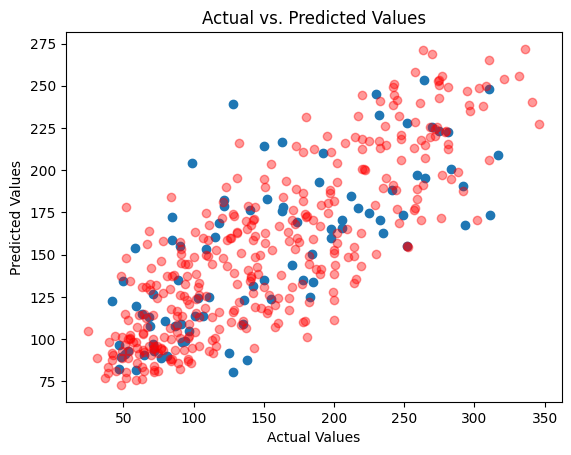

In [118]:
print("The best features are: ", grid.best_params_)
print("The best estimator is ", grid.best_estimator_)
print('grid something: ', grid.verbose)
print("The score of this is: ", np.sqrt(-grid.best_score_))

#Store the best estimators here
model = grid.best_estimator_.fit(X_train, y_train)
#Use this to predict the factors
y_pred = model.predict(X_test)

y_train_pred = grid.best_estimator_.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("MSE: ", mse)
print("R2: ", r2)
print("RSME: ", mse**.5)

print("MSE Train: ", mse_train)
print("R2 Train: ", r2_train)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.scatter(y_train, y_train_pred, color = 'red', alpha=.4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

#Iteration after using Random search to focus on a few hotstops Time Taken: 35mins

In [ ]:
#We saw earlier that only bmi and s5 could be good predictors together. We can test this:

In [ ]:
X_copy = X[['bmi', 's5']]

In [ ]:
#This was just testing with only those two factors that seemed to be the most signfiicant
#This could be useful when interpreting and later on since we know what to change to lead to signficant change
test_stratifed_factors(X_copy, y, y_binned)
rfr = RandomForestRegressor(max_depth = 5, random_state = 42, max_features='sqrt', min_samples_split=2,
                            n_estimators=300)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("MSE Test: ", mse)
print("R2 Test: ", r2)
print("RSME Test:", mse**.5)

print("MSE Train: ", mse_train)
print("R2 Train: ", r2_train)
print("RSME Train: ", mse_train**.5)

sns.scatterplot(x=y_test, y=y_pred, color='red', alpha = .5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

sns.scatterplot(x=y_train, y=y_pred_train, color='blue', alpha = .5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
#Now testing using RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
random_forest_grid = {'n_estimators': randint(800, 1200),
    'max_depth': randint(8, 24),
    'min_samples_split': randint(5, 10),
    'min_samples_leaf': randint(5, 10),
    'max_features': ['auto', 'sqrt', 'log2']
  }
#Reset the rfr

rfr = RandomForestRegressor(random_state = 42)

In [ ]:
rfr = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=random_forest_grid,
    n_iter=20,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    random_state=42
)


In [ ]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f97da1bcb50>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f97da36ddd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f97da1bd010>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f97da1bf950>},
                   random_state=42, scoring='r2')

In [ ]:
#This is the test factor for the random search parameters
print("The Random Searches Fixed", random_search.best_params_)
print("The best estimator is ", random_search.best_estimator_)
print("The score of this is: ", random_search.best_score_)

random_forest_tables = update_param_table(random_forest_tables, random_search.best_score_, random_search.best_estimator_.get_params())

The Random Searches Fixed {'max_depth': 22, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 849}
The best estimator is  RandomForestRegressor(max_depth=22, max_features='log2', min_samples_leaf=5,
                      min_samples_split=8, n_estimators=849, random_state=42)
The score of this is:  0.43564240873142906


In [ ]:
#This table will give me a range of different depths, features, nodes and things I can look at and plug into the GridSearchCV
#Exported to csv for ease
random_forest_tables
random_forest_tables.to_csv('random_forest_tables.csv', ',')

<ipython-input-105-e9205275cb88>:3: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  random_forest_tables.to_csv('random_forest_tables.csv', ',')


In [152]:
def best_param_table(score, estimators):
    ordered = {'Run Number' : [0], 'Best Score': [score]}
    for key, value in estimators.items():
        ordered[key] = [value]
    return pd.DataFrame(ordered)
def update_param_table(table, score, estimators, run_num):
  new_row = {'Run Number' : [run_num], 'Best Score' : [score]}
  new_row.update(estimators)
  return pd.concat([table, pd.DataFrame(new_row)])

In [131]:
#Auto Tuning process to see what work:

In [201]:
#Used bit of AI help but was able to complete functions for auto tunining parameters
def refine_bounds(best_params, current_bounds, shrink=0.7):
    from scipy.stats import distributions
    new_bounds = {}
    for param, value in best_params.items():
        if isinstance(current_bounds[param], distributions.rv_frozen): #and param != 'max_depth'
            low = current_bounds[param].a
            high = current_bounds[param].b
            range_width = high - low
            new_low = max(int(value - shrink * range_width / 2), 1)
            new_high = int(value + shrink * range_width / 2)
            new_bounds[param] = randint(new_low, new_high + 1)
        elif isinstance(current_bounds[param], list):
            new_bounds[param] = [value]
    return new_bounds

def auto_tune_random_search(X_train, y_train, base_grid, n_runs=5, n_iter=20, table=None):
  from copy import deepcopy
  random_forest_grid = deepcopy(base_grid)
  for i in range(n_runs):
    print(f"Run {i+1}/{n_runs}")
    rfr = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=rfr,
        param_distributions=random_forest_grid,
        n_iter=n_iter,
        scoring='r2',
        cv=5,
        n_jobs=-1,
        random_state= 42
    )
    random_search.fit(X_train, y_train)
    print("The Random Searches Fixed", random_search.best_params_)
    print("The best estimator is ", random_search.best_estimator_)
    print("The score of this is: ", random_search.best_score_)

    if table is None:
      table = best_param_table(random_search.best_score_, random_search.best_estimator_.get_params())
    else:
      table = update_param_table(table, random_search.best_score_, random_search.best_estimator_.get_params(), i)
    random_forest_grid = refine_bounds(random_search.best_params_, random_forest_grid)

  return table

In [ ]:
#Base Grid
random_forest_grid = {'n_estimators': randint(200, 1200),
    'max_depth': randint(1, 5),
    'min_samples_split': randint(2, 30),
    'min_samples_leaf': randint(2, 30),
    'max_features': ['auto', 'sqrt', 'log2']
  }
table_v2 = auto_tune_random_search(X_train, y_train, random_forest_grid, n_runs=25, n_iter=20)


Run 1/25


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

The Random Searches Fixed {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 391}
The best estimator is  RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=3, n_estimators=391, random_state=42)
The score of this is:  0.42660560395454217
Run 2/25


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

The Random Searches Fixed {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 704}
The best estimator is  RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=4, n_estimators=704, random_state=42)
The score of this is:  0.4321466196447156
Run 3/25


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

The Random Searches Fixed {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 539}
The best estimator is  RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=539, random_state=42)
The score of this is:  0.43737758940240157
Run 4/25
The Random Searches Fixed {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 554}
The best estimator is  RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=554, random_state=42)
The score of this is:  0.43704157391390674
Run 5/25
The Random Searches Fixed {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 540}
The best estimator is  RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                      min_samples_spli

In [ ]:
#Plotting the run versus the score value so we can see the rate of improvement. Seems to be improving logrithmically which makes sense with how we are improving the model (with .5 split)
#With .7 split, we see a less repeatable pattern which makes me think that 15 runs is not enough.
plt.plot(table_v2['Run Number'], table_v2['Best Score'], marker='o', color='red', lw=3)
plt.xlabel('Run Number')
plt.ylabel('Best Score')
plt.title('Best Score vs Run Number')
plt.show()

In [200]:
table_v2.head(15)
#After running this 100 times, I will plug the values within 10% into the grid search

,Run Number,Best Score,bootstrap,ccp_alpha,criterion,max_depth,max_features,max_leaf_nodes,max_samples,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,monotonic_cst,n_estimators,n_jobs,oob_score,random_state,verbose,warm_start
0,0,0.426606,True,0.0,squared_error,4,sqrt,None,None,0.0,7,3,0.0,None,391,None,False,42,0,False
0,1,0.432147,True,0.0,squared_error,5,sqrt,None,None,0.0,5,4,0.0,None,704,None,False,42,0,False
0,2,0.437378,True,0.0,squared_error,5,sqrt,None,None,0.0,3,6,0.0,None,539,None,False,42,0,False
0,3,0.437042,True,0.0,squared_error,5,sqrt,None,None,0.0,2,6,0.0,None,554,None,False,42,0,False
0,4,0.437255,True,0.0,squared_error,5,sqrt,None,None,0.0,2,6,0.0,None,540,None,False,42,0,False
0,5,0.437047,True,0.0,squared_error,5,sqrt,None,None,0.0,2,6,0.0,None,529,None,False,42,0,False
0,6,0.437119,True,0.0,squared_error,5,sqrt,None,None,0.0,2,6,0.0,None,555,None,False,42,0,False
0,7,0.437138,True,0.0,squared_error,5,sqrt,None,None,0.0,2,6,0.0,None,587,None,False,42,0,False
0,8,0.437265,True,0.0,squared_error,5,sqrt,None,None,0.0,2,6,0.0,None,579,None,False,42,0,False
0,9,0.437353,True,0.0,squared_error,5,sqrt,None,None,0.0,2,6,0.0,None,580,None,False,42,0,False


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

The best features are:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 122}
The best estimator is  RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=3, n_estimators=122, random_state=42)
grid something:  0
The score of this is:  57.746073914531955
MSE:  3027.427550082201
R2:  0.4940529352552189
RSME:  55.02206421138888
MSE Train:  2310.27731396679
R2 Train:  0.6095039402912562


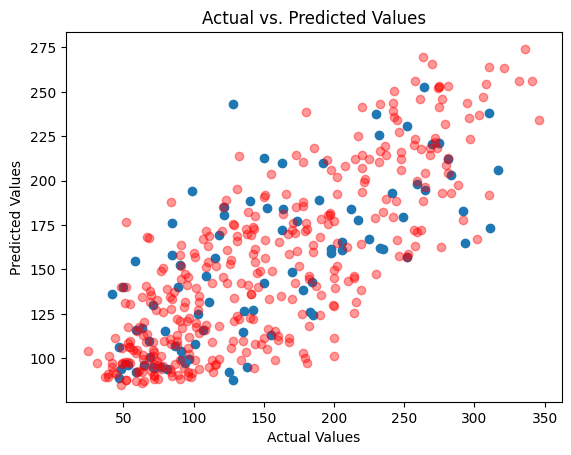

In [185]:
param_grid = {
    'n_estimators': [110, 122, 133],
    'max_depth': [4],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [3, 4, 5, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error')


model = grid.fit(X_train, y_train)
print("The best features are: ", grid.best_params_)
print("The best estimator is ", grid.best_estimator_)
print('grid something: ', grid.verbose)
print("The score of this is: ", np.sqrt(-grid.best_score_))

#Store the best estimators here
model = grid.best_estimator_.fit(X_train, y_train)
#Use this to predict the factors
y_pred = model.predict(X_test)

y_train_pred = grid.best_estimator_.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("MSE: ", mse)
print("R2: ", r2)
print("RSME: ", mse**.5)

print("MSE Train: ", mse_train)
print("R2 Train: ", r2_train)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.scatter(y_train, y_train_pred, color = 'red', alpha=.4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()